# Implementation and Evaluating the Performance of Various Graph Exploration Algorithms

Shivangi

U35642613

In [146]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [161]:
class Graph:
    def __init__(self, edges = None, nodes = None):
        self.edges = edges
        self.nodes = nodes
        self.edge_list = []
        self.node_list = []
        self.G = None
        self.random_number = {}
        self.degree = None

    def create_graph(self):
        self.G = nx.Graph()
        
        self.G.add_nodes_from(range(1, self.nodes+1))

        for i in range(self.edges):
            u = random.randint(1, self.nodes)
            v = random.randint(1, self.nodes)
            while u == v or self.G.has_edge(u, v):
                u = random.randint(1, self.edges)
                v = random.randint(1, self.edges)
            self.G.add_edge(u, v)

        while not nx.is_connected(self.G):
            u, v = random.sample(self.G.nodes, 2)
            while self.G.has_edge(u, v):
                u, v = random.sample(self.G.nodes, 2)
            self.G.add_edge(u, v)

        self.edge_list = self.G.edges()
        self.node_list = self.G.nodes()
    
    def generate_r(self):
        num_of_edges = len(list(self.edge_list))

        for e in list(self.edge_list):
            temp = random.uniform(1, num_of_edges+1)
            self.random_number[e] = temp

    def get_r(self, edge):
        u, v = edge
        edgeT = v, u
        if(edge in self.random_number.keys()):
            return self.random_number[edge]
        elif(edgeT in self.random_number.keys()):
            return self.random_number[edgeT]

    def draw_graph(self):
        pos = nx.spring_layout(self.G)

        fig, ax = plt.subplots()

        nx.draw_networkx_nodes(self.G, pos, ax=ax)
        nx.draw_networkx_edges(self.G, pos, ax=ax)
        nx.draw_networkx_labels(self.G, pos, ax=ax)
        plt.show()

    def find_adjacent_edges(self, edge):
        adj_edges = []
        edges = list(self.edge_list)
        edges.remove(edge)
        u1, v1 = edge
        for e in edges:
            u2, v2 = e
            if edge != e:
                if(u1 == u2 or v1 == v2 or u1 == v2 or u2 == v1):
                    adj_edges.append(e)
        return adj_edges
    
    def sort_edges(self, edges):
        temp = {}
        for i in self.random_number:
            if(i in edges):
                temp[i] = self.random_number[i]
        temp = {k: temp[k] for k in sorted(temp)}
        temp = list(temp.keys())
        return temp
    
    def get_avg_degree(self):
        return sum(dict(self.G.degree()).values()) / len(self.G.nodes)

# Answer to Q1

## Graph Exploration Algorithms

### Random Greedy Maximal Matching Algorithm

In [148]:
def random_greedy_maximal_matching(my_graph):
    edges = list(my_graph.edge_list)
    random.shuffle(edges)
    M = set()
    for e in edges:
        if not any(v in e for v in set().union(*M)):
            M.add(e)
    return M

### Selected1 Algorithm

In [ ]:
recursions = {}

In [258]:
def selected1(my_graph, e):
    selected = True
    adjacent_edges = my_graph.find_adjacent_edges(e)
    for edge in adjacent_edges:
        if my_graph.get_r(edge) < my_graph.get_r(e):
            recursions["selected1"] += 1
            if(recursions["selected1"] > 4000000):
                raise Exception("Reached maximum recursion depth")
            if selected1(my_graph, edge):
                selected = False
    return selected

def run_selected1(my_graph):
    edges = list(my_graph.edge_list)
    # print(edges)
    random.shuffle(edges)
    M = set()
    for e in edges:
        # print(recursions)
        if selected1(my_graph, e):
            M.add(e)
    return M

### Selected2 Algorithm

In [262]:
def selected2(my_graph, edge):
    adjacent_edges = my_graph.find_adjacent_edges(edge)
    random.shuffle(adjacent_edges)  # random permutation of adjacent edges
    for e in adjacent_edges:
        if my_graph.get_r(e) < my_graph.get_r(edge):
            recursions["selected2"] += 1
            if(recursions["selected2"] > 4000000):
                raise Exception("Reached maximum recursion depth")
            if selected2(my_graph, e):
                return False
    return True

def run_selected2(my_graph):
    edges = list(my_graph.edge_list)
    random.shuffle(edges)
    M = set()
    for e in edges:
        if selected2(my_graph, e):
            M.add(e)
    return M

### Selected3 Algorithm

In [270]:
def selected3(my_graph, edge):
    adjacent_edges = my_graph.sort_edges(my_graph.find_adjacent_edges(edge))
    for e in adjacent_edges:
        if my_graph.get_r(e) < my_graph.get_r(edge):
            recursions["selected3"] += 1
            if(recursions["selected3"] > 4000000):
                raise Exception("Reached maximum recursion depth")
            if selected3(my_graph, e):
                return False
            
    return True

def run_selected3(my_graph):
    edges = list(my_graph.edge_list)
    random.shuffle(edges)
    M = set()
    for e in edges:
        if selected3(my_graph, e):
            M.add(e)
    return M

### My variation of graph exploration Algorithm

I have implemented a hybrid of selected1 and selected3. The idea behind this algorithm is to first sort the edges adjacent to the starting edge in increasing order of their random values (as done in selected3), and then explore them one by one, checking whether each edge is selected (as done in selected1). However, to improve efficiency, I have store the selected status of each edge in a dictionary, so that I never have to recompute the solution for an edge if I visit it again.
The rationale behind using this algorithm is that it is a recursive implementation of the graph exploration algorithm and uses memoization to avoid recomputing the same result again. This can improve the performance of the algorithm for large graphs as it reduces the number of recursive calls and prevents stack overflow errors.

In [271]:
explored = {}
def my_version(my_graph, edge):
    
    adjacent_edges = my_graph.sort_edges(my_graph.find_adjacent_edges(edge))

    for e in adjacent_edges:
        if my_graph.get_r(e) < my_graph.get_r(edge):
            if(e in explored):
                if(explored[e]):
                    return False
            recursions["selected1"] += 1
            if(recursions["selected1"] > 4000000):
                raise Exception("Reached maximum recursion depth")
            status = my_version(my_graph, e)
            # print("Explored in for: ", e, edge, status)
            explored[e] = status
            if status:
                # print("Explored in if: ", e, edge, False)
                explored[edge] = False
                return False 
                
    # print("Explored at the end: ", edge, True)
    explored[edge] = True
    return True

def run_my_version(my_graph):
    explored.clear()
    edges = list(my_graph.edge_list)
    random.shuffle(edges)
    # print("Explored rn: ", explored)
    M = set()

    for e in edges:
        # print("Edge in run: ", e)
        if(my_version(my_graph, e)):
            explored[e] = True
            M.add(e)
        else:
            explored[e] = False
        # print("M after every iteration: ", M)
        # print("Explored at the end of the iteration: ", explored)

    return M

### Testing Graph Exploration Agorithms

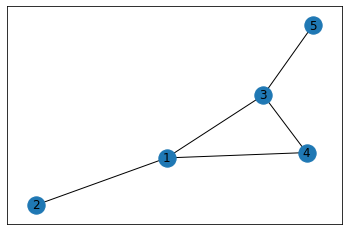

Maximal Matching using Random Greedy Maximal Matching Algorithm:  {(1, 3)}
Maximal Matching using selected1 Algorithm:  {(3, 5), (1, 4)}
Maximal Matching using selected2 Algorithm:  {(3, 5), (1, 4)}
Maximal Matching using selected3 Algorithm:  {(3, 5), (1, 4)}
Maximal Matching using My Variation:  {(1, 4), (3, 5)}


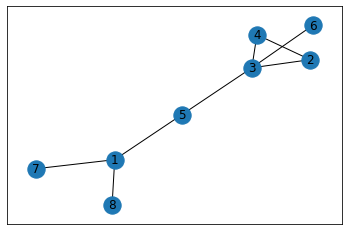

Maximal Matching using Random Greedy Maximal Matching Algorithm:  {(1, 8), (3, 4)}
Maximal Matching using selected1 Algorithm:  {(2, 4), (1, 7), (3, 6)}
Maximal Matching using selected2 Algorithm:  {(1, 7), (2, 4), (3, 6)}
Maximal Matching using selected3 Algorithm:  {(1, 7), (2, 4), (3, 6)}
Maximal Matching using My Variation:  {(2, 4), (1, 7), (3, 6)}


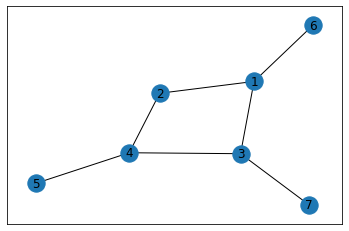

Maximal Matching using Random Greedy Maximal Matching Algorithm:  {(3, 7), (2, 4), (1, 6)}
Maximal Matching using selected1 Algorithm:  {(1, 6), (2, 4), (3, 7)}
Maximal Matching using selected2 Algorithm:  {(3, 7), (2, 4), (1, 6)}
Maximal Matching using selected3 Algorithm:  {(3, 7), (2, 4), (1, 6)}
Maximal Matching using My Variation:  {(3, 7), (2, 4), (1, 6)}


In [154]:
graph1 = Graph(5, 4)
graph1.create_graph()
graph1.generate_r()
graph1.draw_graph()

print("Maximal Matching using Random Greedy Maximal Matching Algorithm: ", random_greedy_maximal_matching(graph1))
print("Maximal Matching using selected1 Algorithm: ", run_selected1(graph1))
print("Maximal Matching using selected2 Algorithm: ", run_selected2(graph1))
print("Maximal Matching using selected3 Algorithm: ", run_selected3(graph1))
print("Maximal Matching using My Variation: ", run_my_version(graph1))


graph1 = Graph(8, 6)
graph1.create_graph()
graph1.generate_r()
graph1.draw_graph()

print("Maximal Matching using Random Greedy Maximal Matching Algorithm: ", random_greedy_maximal_matching(graph1))
print("Maximal Matching using selected1 Algorithm: ", run_selected1(graph1))
print("Maximal Matching using selected2 Algorithm: ", run_selected2(graph1))
print("Maximal Matching using selected3 Algorithm: ", run_selected3(graph1))
print("Maximal Matching using My Variation: ", run_my_version(graph1))

graph1 = Graph(7, 5)
graph1.create_graph()
graph1.generate_r()
graph1.draw_graph()

print("Maximal Matching using Random Greedy Maximal Matching Algorithm: ", random_greedy_maximal_matching(graph1))
print("Maximal Matching using selected1 Algorithm: ", run_selected1(graph1))
print("Maximal Matching using selected2 Algorithm: ", run_selected2(graph1))
print("Maximal Matching using selected3 Algorithm: ", run_selected3(graph1))
print("Maximal Matching using My Variation: ", run_my_version(graph1))

# Asnwer to Q2
## Graph Generation Algorithms

### Random Matchings Graph Generation Algorithm

In [164]:
def random_matchings_graph_generation(self, nodes, degree):
    self.nodes = nodes
    self.degree = degree
    
    self.G = nx.Graph()
    A = set(range(self.nodes//2))
    B = set(range(self.nodes//2, self.nodes))
    
    for i in tqdm(range(self.degree)):
        matching = [(random.sample(A, 1)[0], random.sample(B, 1)[0]) for j in range(self.nodes//2)]
        self.G.add_edges_from(matching)

    self.edge_list = self.G.edges()
    self.node_list = self.G.nodes()

Graph.random_matchings_graph_generation = random_matchings_graph_generation

### Euclidean Square Graph Generation Algorithm

In [165]:
def euclidean_square_graph_generation(self, nodes, degree):
    if degree >= nodes:
        raise ValueError("d must be less than n")

    self.nodes = nodes
    self.degree = degree
    
    self.G = nx.Graph()
    
    points = [(random.random(), random.random()) for i in range(self.nodes)]
    
    for i in tqdm(range(self.nodes)):
        distances = [(j, ((points[i][0]-points[j][0])**2 + (points[i][1]-points[j][1])**2)**0.5) for j in range(self.nodes) if i != j]
        distances.sort(key=lambda x: x[1])
        neighbors = [distances[j][0] for j in range(self.degree)]
        self.G.add_edges_from([(i, j) for j in neighbors])

    self.edge_list = self.G.edges()
    self.node_list = self.G.nodes()
        
Graph.euclidean_square_graph_generation = euclidean_square_graph_generation

### Testing Graph Generation Algorithms

100%|██████████| 5/5 [00:00<00:00, 989.04it/s]

Graph Generated using Random Matching Graph Generation Algorithm


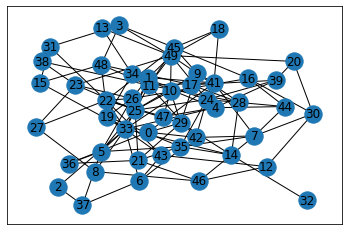

Average Degree of the Graph:  4.6938775510204085


100%|██████████| 50/50 [00:00<00:00, 7049.01it/s]

Graph Generated using Euclidean Square Graph Generation Algorithms


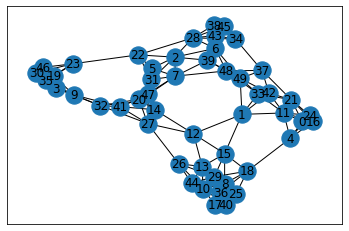

Average Degree of the Graph:  6.08


100%|██████████| 4/4 [00:00<00:00, 6450.29it/s]

Graph Generated using Random Matching Graph Generation Algorithm


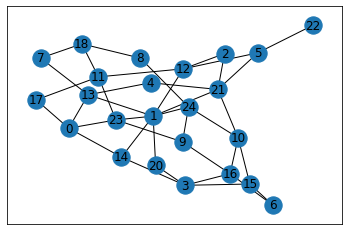

Average Degree of the Graph:  3.25


100%|██████████| 25/25 [00:00<00:00, 19099.74it/s]

Graph Generated using Euclidean Square Graph Generation Algorithms


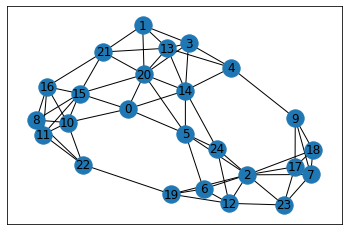

Average Degree of the Graph:  5.2


100%|██████████| 10/10 [00:00<00:00, 838.91it/s]

Graph Generated using Random Matching Graph Generation Algorithm


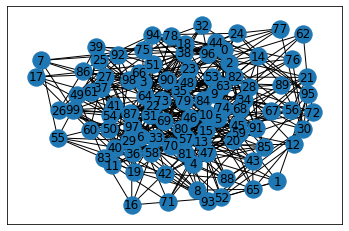

Average Degree of the Graph:  9.14


100%|██████████| 100/100 [00:00<00:00, 6399.61it/s]

Graph Generated using Euclidean Square Graph Generation Algorithms


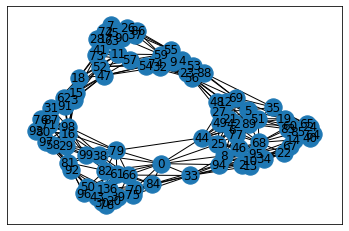

Average Degree of the Graph:  11.72


In [157]:
graph2 = Graph()
graph2.random_matchings_graph_generation(50, 5)
print("Graph Generated using Random Matching Graph Generation Algorithm")
graph2.draw_graph()
print("Average Degree of the Graph: ", graph2.get_avg_degree())

graph3 = Graph()
graph3.euclidean_square_graph_generation(50, 5)
print("Graph Generated using Euclidean Square Graph Generation Algorithms")
graph3.draw_graph()
print("Average Degree of the Graph: ", graph3.get_avg_degree())

graph2 = Graph()
graph2.random_matchings_graph_generation(25, 4)
print("Graph Generated using Random Matching Graph Generation Algorithm")
graph2.draw_graph()
print("Average Degree of the Graph: ", graph2.get_avg_degree())

graph3 = Graph()
graph3.euclidean_square_graph_generation(25, 4)
print("Graph Generated using Euclidean Square Graph Generation Algorithms")
graph3.draw_graph()
print("Average Degree of the Graph: ", graph3.get_avg_degree())

graph2 = Graph()
graph2.random_matchings_graph_generation(100, 10)
print("Graph Generated using Random Matching Graph Generation Algorithm")
graph2.draw_graph()
print("Average Degree of the Graph: ", graph2.get_avg_degree())

graph3 = Graph()
graph3.euclidean_square_graph_generation(100, 10)
print("Graph Generated using Euclidean Square Graph Generation Algorithms")
graph3.draw_graph()
print("Average Degree of the Graph: ", graph3.get_avg_degree())

# Testing Graph Generation methods on Graph Exploration Algorithms
Used this part of the code to collect the data that I used to generate the tables and the graphs

In [196]:
recursions = {}

In [273]:
for j in range(1,6):
  for i in range(3):
      recursions.clear()
      recursions['selected1'] = 0

      # need to run for same d and n 3 times

      # range_d = [1, 15]
      # range_n = [500, 10000]
    

      graph4 = Graph()

      # d = random.randint(range_d[0], range_d[1])
      # n = random.randint(range_n[0], range_n[1])

      graph4.random_matchings_graph_generation(1000, j)

      # print("Graph Created using Random Matchings Algorithm\nAverage Degree of the Graph: " + str(graph4.get_avg_degree()))

      graph4.generate_r()
      # print("\n", recursions)
      run_my_version(graph4)
      print("\n", recursions)

100%|██████████| 1/1 [00:00<00:00, 50.16it/s]



 {'selected1': 210}


100%|██████████| 1/1 [00:00<00:00, 69.50it/s]



 {'selected1': 217}


100%|██████████| 1/1 [00:00<00:00, 70.98it/s]



 {'selected1': 224}


100%|██████████| 2/2 [00:00<00:00, 94.73it/s]



 {'selected1': 1030}


100%|██████████| 2/2 [00:00<00:00, 90.83it/s]



 {'selected1': 923}


100%|██████████| 2/2 [00:00<00:00, 94.77it/s]



 {'selected1': 1071}


100%|██████████| 3/3 [00:00<00:00, 93.62it/s]



 {'selected1': 3158}


100%|██████████| 3/3 [00:00<00:00, 97.50it/s]



 {'selected1': 3055}


100%|██████████| 3/3 [00:00<00:00, 61.34it/s]



 {'selected1': 2884}


100%|██████████| 4/4 [00:00<00:00, 103.29it/s]



 {'selected1': 10011}


100%|██████████| 4/4 [00:00<00:00, 95.47it/s]



 {'selected1': 12382}


100%|██████████| 4/4 [00:00<00:00, 104.40it/s]



 {'selected1': 8622}


100%|██████████| 5/5 [00:00<00:00, 102.73it/s]



 {'selected1': 23467}


100%|██████████| 5/5 [00:00<00:00, 103.18it/s]



 {'selected1': 30330}


100%|██████████| 5/5 [00:00<00:00, 106.11it/s]



 {'selected1': 25884}


In [257]:
print("Number of Recursive calls for selected1 Algorithm: ", recursions['selected1'])

Number of Recursive calls for selected1 Algorithm:  22930
